# Two dimensional random walk

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

In [2]:
choices = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])

In [3]:
def make_steps(n_steps=100):
    result = np.array([[0, 0]])
    for i in range(n_steps):
        result += random.choice(choices)
    return result

In [4]:
results = np.array([[0, 0]])
n_tries = 10000
for i in range(n_tries):
    results = np.concatenate((results, make_steps()))
results

array([[  0,   0],
       [  4,   4],
       [  1,  -1],
       ..., 
       [  1,  -7],
       [  4,   0],
       [ 13, -11]])

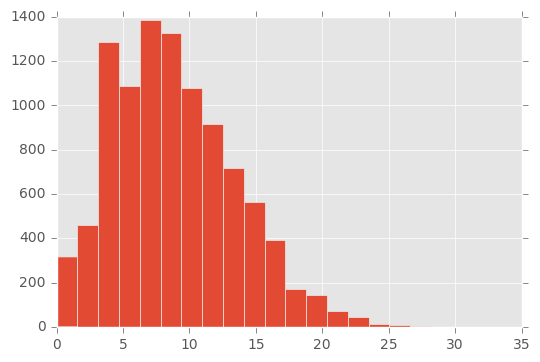

In [5]:
distances = np.apply_along_axis(lambda x: np.sqrt(x[0]**2 + x[1]**2), 1, results)
plt.hist(distances, bins=20)
plt.show()

In [6]:
np.mean(distances)

8.8670328118535249

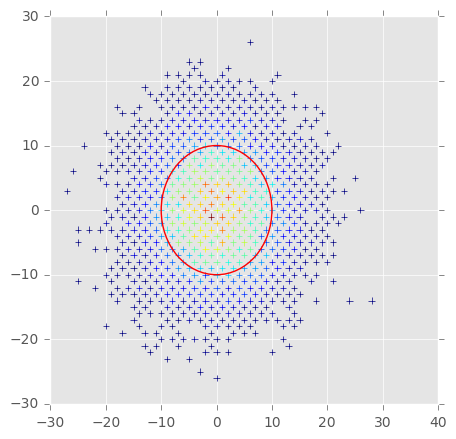

In [7]:
results_d = pd.DataFrame(results, columns=("x", "y")).groupby(["x", "y"]).size().reset_index(name="count")

fig = plt.figure(figsize=(5, 5))
plt.scatter(results_d["x"], results_d["y"], c=results_d["count"], marker='+')
ax = plt.gca()
ax.add_artist(plt.Circle((0, 0), 10, fill=False, linewidth=1, color="red"))

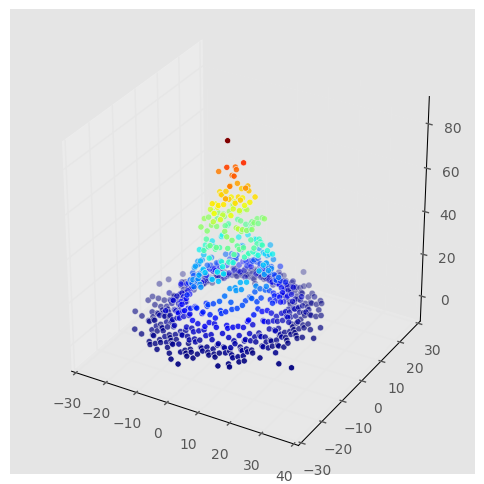

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d')
ax.scatter(results_d["x"], results_d["y"], results_d["count"], c=results_d["count"])